In [119]:
import pandas as pd

import csv

#with open("concrete.csv","r")as file:

#    reader=csv.reader(file)
df=pd.read_csv("data_set.csv")

df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

#### a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). 

In [121]:
df.shape

(1030, 9)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement              1030 non-null float64
slag                1030 non-null float64
flyash              1030 non-null float64
water               1030 non-null float64
superplasticizer    1030 non-null float64
coarseaggregate     1030 non-null float64
fineaggregate       1030 non-null float64
age                 1030 non-null int64
csMPa               1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<h1>Inferences:</h1>
 
 -->Number of rows 1030
 
 -->Number of columns 9
 
 -->Types of columns - 9 Numercial columns (1 of which is our target variable)

#### a. Fixing Data.

In [123]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [124]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [125]:
df['age'].head()

0     28
1     28
2    270
3    365
4    360
Name: age, dtype: int64

We notice the different types of float variables and one integer variables age. 

Notcied - 

 --> The dataset has no null values. This meanns that we do not have to impute anything.
 
 
<b>We will now perform graphical analysis to understand the data more thoroughy<b>

#### b. Visualizing the data.

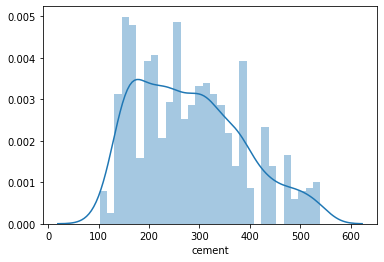

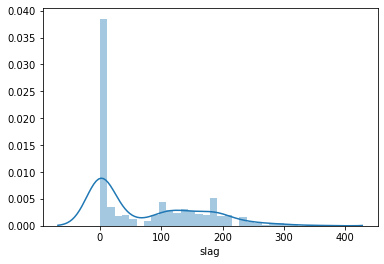

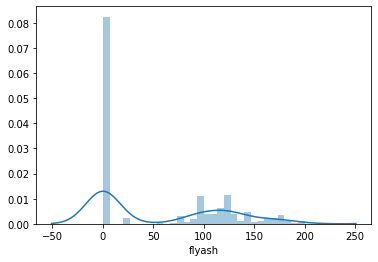

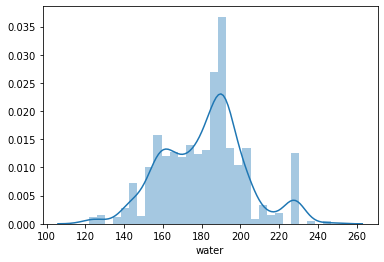

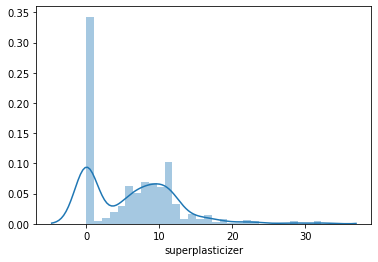

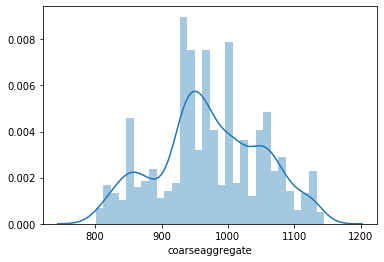

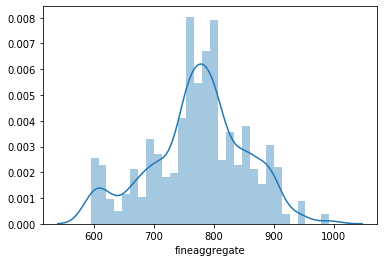

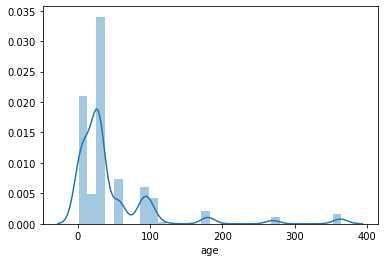

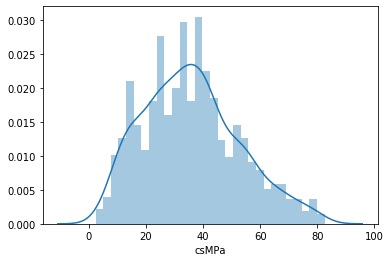

In [126]:
l = df.columns

for i in l:
    sns.distplot(df[i],bins = 30)
    plt.show()

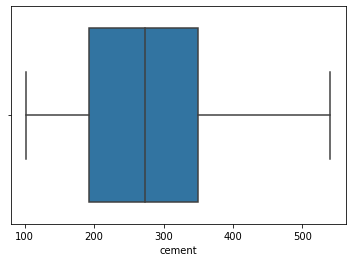

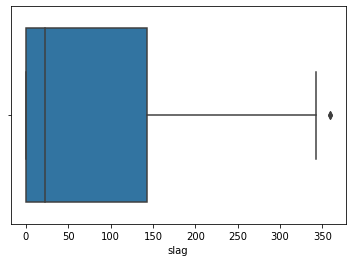

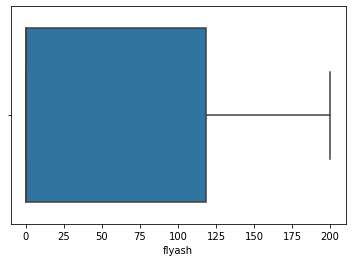

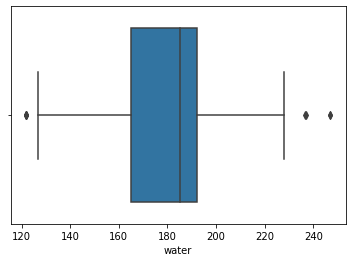

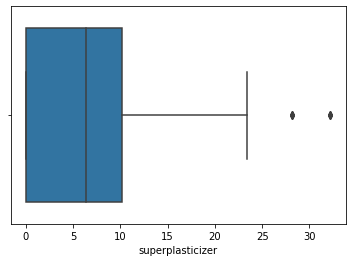

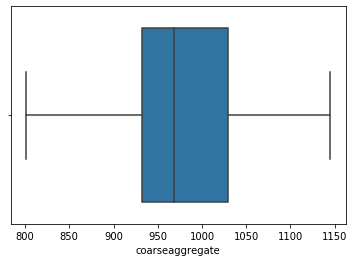

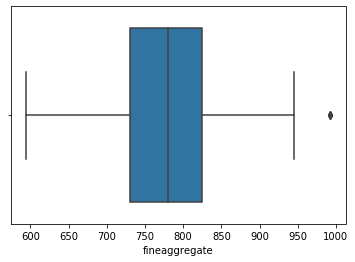

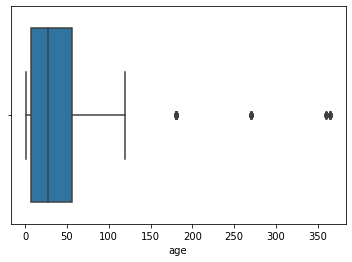

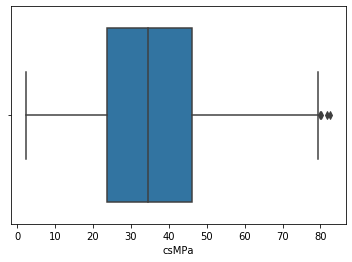

In [127]:
for i in l:
    sns.boxplot(df[i])
    plt.show()

We notice that our target variable csMPa has some outliers. We now try tranforming it to undestand if that reduces outliers and increases normality

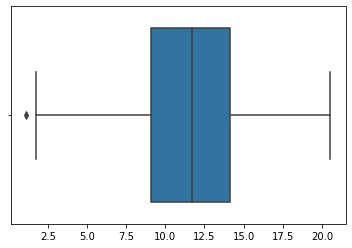

In [128]:
x , y= stats.boxcox(df['csMPa'])
sns.boxplot(x)

The boxcox tranformation removes outliers to a significant extent. We thus use this to tranform our target variable and remove outliers.

In [129]:
df['csMPa'],dummy = stats.boxcox(df['csMPa'])

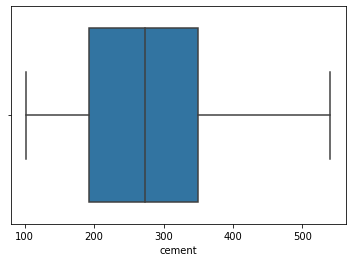

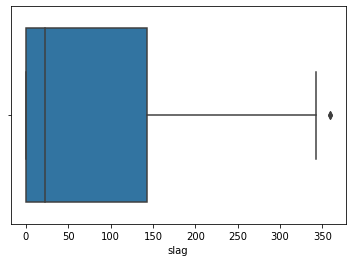

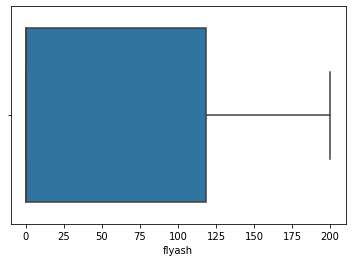

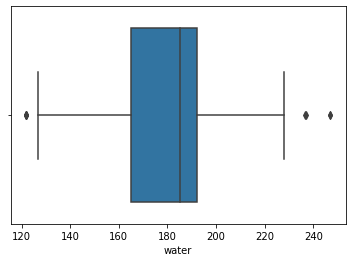

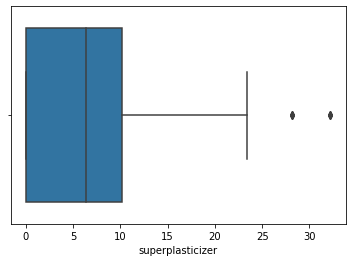

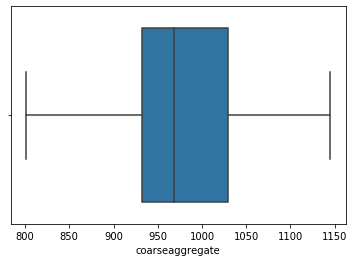

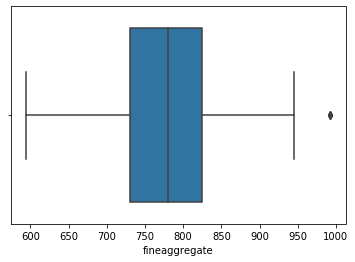

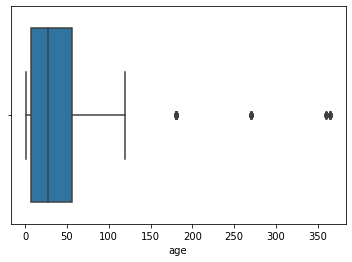

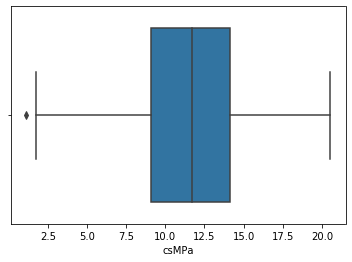

In [130]:
l = df.columns
for i in l:
    sns.boxplot(df[i])
    plt.show()

Inferences :

We now notice that out target variable no longer has outliers and can be now further pre-processed.

#### Find out the variables which are highly correlated with target variable? 

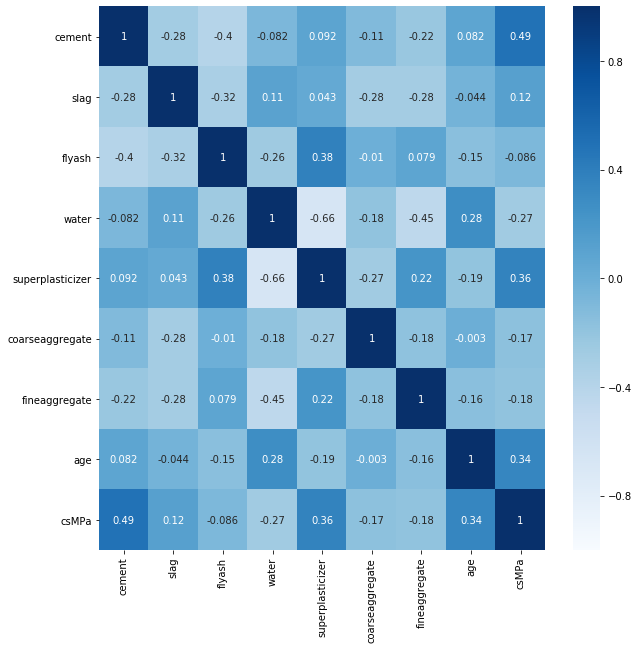

In [131]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', vmin  = -1)

Inferences: We see three columns correlated with out target variable. They are:

-->cement

-->superplasticiser

-->age

There three columns will be important for our model building.

#### c. Exclusing Irreleant Variables

As of right now, all variables seem important for building the model.

I will now create a variance inflation factor matrix to see which columns show high multicollinearity. These columns will be dropped from out dataset.

In [132]:
X = df.drop(columns = ['csMPa'])

In [133]:
VIF = pd.DataFrame()

VIF['Feature'] = X.columns

VIF['vif_score'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]



In [134]:
VIF

,Feature,vif_score
0,cement,15.456717
1,slag,3.329127
2,flyash,4.147833
3,water,82.157569
4,superplasticizer,5.471094
5,coarseaggregate,84.955779
6,fineaggregate,72.790995
7,age,1.699459


We see some columns that show very high multicollinearity. We now drop the columns that have the highest multicollinearity.

They are:

-->Water

-->Coarseaggregate


In [135]:
df.drop(columns = ['water','coarseaggregate'], inplace = True)

#### d. Split dataset into train and test (70:30).

In [136]:
X = df.drop(columns = ['csMPa'])
y = df['csMPa']

In [137]:
Xtrain,Xtest,ytrain,ytest = train_test_split( X , y , test_size = 0.3, random_state = 14)

We have now split the data into Xtrain and Xtest. We check if they are statsitically the same using various statisical measure such as the different measures of central tendency.

In [138]:
Xtrain.describe()

,cement,slag,flyash,superplasticizer,fineaggregate,age
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,280.541054,72.011234,54.998474,6.237864,774.070596,46.208044
std,103.989870,84.776066,64.213617,5.957653,78.649230,63.865384
min,102.000000,0.000000,0.000000,0.000000,594.000000,1.000000
25%,190.700000,0.000000,0.000000,0.000000,736.600000,7.000000
50%,266.000000,20.000000,0.000000,6.500000,780.100000,28.000000
75%,355.000000,142.500000,118.300000,10.400000,822.000000,56.000000
max,540.000000,359.400000,195.000000,32.200000,992.600000,365.000000


In [139]:
Xtest.describe()

,cement,slag,flyash,superplasticizer,fineaggregate,age
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,282.630421,78.293204,52.298058,6.127184,772.436893,44.388350
std,105.857029,89.675496,63.552114,6.020428,83.749839,61.599813
min,102.000000,0.000000,0.000000,0.000000,594.000000,3.000000
25%,194.700000,0.000000,0.000000,0.000000,716.100000,14.000000
50%,277.000000,24.000000,0.000000,6.100000,772.000000,28.000000
75%,349.000000,145.000000,117.500000,10.000000,828.500000,56.000000
max,540.000000,342.100000,200.100000,32.200000,992.600000,365.000000


In [140]:
pd.DataFrame(Xtrain.describe().values - Xtest.describe().values, columns = Xtrain.columns, index=Xtest.describe().index)

,cement,slag,flyash,superplasticizer,fineaggregate,age
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,-2.089367,-6.281969,2.700416,0.110680,1.633703,1.819695
std,-1.867159,-4.899429,0.661502,-0.062775,-5.100609,2.265570
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,-4.000000,0.000000,0.000000,0.000000,20.500000,-7.000000
50%,-11.000000,-4.000000,0.000000,0.400000,8.100000,0.000000
75%,6.000000,-2.500000,0.800000,0.400000,-6.500000,0.000000
max,0.000000,17.300000,-5.100000,0.000000,0.000000,0.000000


Inferences:

The above dataframe shows the difference in different statistical measures of the dataframe. It is visible that these differences are almost neglidgible in all the values. This indicates that both the Dataframes as similar representatives of the dataset and can thus be used for model building and testing.

#### a. Fit a base model and observe the overall R- Squared, RMSE and MAPE values of the model.

In [141]:
#fitting a base model.
lr = LinearRegression()
lr.fit(Xtrain,ytrain)

LinearRegression()

In [142]:
def MAPE(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual-y_pred)/y_actual))*100
    return mape

In [143]:
#evaluating the base model


y_train_pred = lr.predict(Xtrain)
print('The overall R-Squared of the model:', r2_score(ytrain,y_train_pred))
print('The Root Mean Squared Error of the Model:' , np.sqrt(mean_squared_error(ytrain,y_train_pred)))
print('The Mean Absolute Percentage Error : ', MAPE(ytrain,y_train_pred))

The overall R-Squared of the model: 0.5694025774379268
The Root Mean Squared Error of the Model: 2.473573828229907
The Mean Absolute Percentage Error :  21.887157677633123


The overall Error of this 0.56. This means that this is not a very great model. We have to change the dataset, parameters and hyper paramenters to make this model more accurate.

#### b. Check for multi-collinearity and treat the same. 

This has aldready been done before in the preprocessing stage. I shall do it again to reclarify.

In [144]:
VIF = pd.DataFrame()

VIF['Feature'] = Xtrain.columns

VIF['vif_score'] = [variance_inflation_factor(Xtrain.values,i) for i in range(len(Xtrain.columns))]
VIF

,Feature,vif_score
0,cement,9.743851
1,slag,2.093598
2,flyash,3.001855
3,superplasticizer,2.991210
4,fineaggregate,14.852032
5,age,1.609862


<b>Inferences</b>

It is now visible that due to this step aldready bein completed in the data-preprocessing stage, this dataset shows very little multicollinearity. We choose to keep fineaggregate column since dropping it would lead to information loss regarding the different aggregates of cement and this would result in an even lowered accuracy of the model and a skewed busniess understanding.

#### c. How would you improve the model? 

Steps I would take to improve the model:

-->Feature Selection using RFE - This would improve the overall accuracy of the model.

-->KFold Cross Validation to not have skewed results when building model .i.e to use all the different parts of the data as test data.

-->If this too does not work, I will use Decision Tree Regressor to produce a better model. 

In [145]:
#Feature Selecction using RFE
rfe = RFE(estimator=LinearRegression())
rfe.fit(X,y)

RFE(estimator=LinearRegression())

In [146]:
X.columns[rfe.support_]

Index(['cement', 'superplasticizer', 'age'], dtype='object')

In [147]:
rfe.ranking_

array([1, 2, 3, 1, 4, 1])

According to RFE Feature Selection, these are the three variables that are most important for building a model.

In [148]:
X_new = X[['cement','superplasticizer','age','slag','flyash']] #using the top three ranked datasets.

In [149]:
#KFold Cross Validation
cv = KFold(n_splits=10,shuffle=True,random_state=14)

scores  = cross_val_score(estimator=LinearRegression(),X = X_new,y = y,cv=cv)

In [150]:
scores

array([0.63008077, 0.55861934, 0.55736689, 0.52623991, 0.59143333,
       0.58274661, 0.53462446, 0.57668335, 0.55727188, 0.49240166])

In [151]:
print('The mean score after KFold Cross Validation:', scores.mean())
print('The Standard Deviation of Scores after KFold Cross Validation:', scores.std())

The mean score after KFold Cross Validation: 0.5607468197356157
The Standard Deviation of Scores after KFold Cross Validation: 0.036137256802947396


<b>Inferences</b>

 Using RFE and KFold cross Valdation has allowed us to properly pick out the dimensions for our model building. This has resulted in our model being more accurate over more instances.

### Decision Tree Regressor Model

In [179]:
ds = DecisionTreeRegressor()
ds.fit(Xtrain,ytrain)

DecisionTreeRegressor()

In [180]:
y_train_pred = ds.predict(Xtrain)
print('The overall R-Squared of the model:', r2_score(ytrain,y_train_pred))
print('The Root Mean Squared Error of the Model:' , np.sqrt(mean_squared_error(ytrain,y_train_pred)))
print('The Mean Absolute Percentage Error : ', MAPE(ytrain,y_train_pred))

The overall R-Squared of the model: 0.9997149988402986
The Root Mean Squared Error of the Model: 0.06363740736059828
The Mean Absolute Percentage Error :  0.08009962951042834


<b>As we can see, the decision tree regressor is a much better model for this dataset as it presents a much higher R-Squared value and a much lower mean absolute percentage error</b>

## Model Performance on Test Data.

In [177]:
#Linear Regression Model
cv = KFold(n_splits=10,shuffle=True,random_state=14)
rfe = RFE(estimator=LinearRegression(),n_features_to_select=5)
model = make_pipeline(rfe,LinearRegression())
y_test_lin = cross_val_predict(estimator=model,X = Xtest,y = ytest,cv=cv)

print('The overall R-Squared of the model on test data:', r2_score(ytest,y_test_lin))
print('The Root Mean Squared Error of the Model on test data:' , np.sqrt(mean_squared_error(ytest,y_test_lin)))
print('The Mean Absolute Percentage Error on test data: ', MAPE(ytest,y_test_lin))

The overall R-Squared of the model on test data: 0.5748742687672066
The Root Mean Squared Error of the Model on test data: 2.526485308399512
The Mean Absolute Percentage Error on test data:  21.66613614933833


<b>We managed to improve the overall R Squared of our model by 1.7% by using a pipepline model consisting of RFE and Kfold Cross Validation with Linear Regression.

This model performs well on the Test Data.</b>

In [181]:
#DecisionTreeModel
y_test_ds = ds.predict(Xtest)

print('The overall R-Squared of the model on test data:', r2_score(ytest,y_test_ds))
print('The Root Mean Squared Error of the Model on test data:' , np.sqrt(mean_squared_error(ytest,y_test_ds)))
print('The Mean Absolute Percentage Error on test data: ', MAPE(ytest,y_test_ds))

The overall R-Squared of the model on test data: 0.8347496467979407
The Root Mean Squared Error of the Model on test data: 1.5751767010108881
The Mean Absolute Percentage Error on test data:  10.680587723964443


Inferences:

The overall accuracy of this R-Squared of this model is significantly higher that the Linear Regression Model This makes it a more ideal candidate when thinking about deployment in production.

#### d. Write down a business interpretation/explanation of the model.

In [186]:
feature_imp = pd.DataFrame(zip(X.columns,ds.feature_importances_), columns = ['Feature_Name','Feature_Importance'])

In [199]:
feature_imp.sort_values(by = 'Feature_Importance',ascending=False, inplace=True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

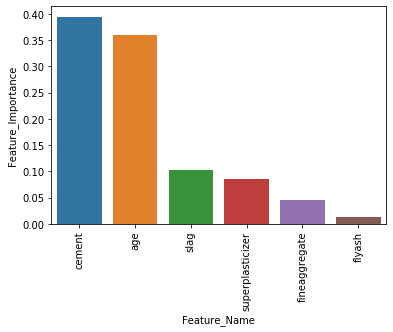

In [204]:
sns.barplot(x = feature_imp['Feature_Name'], y = feature_imp['Feature_Importance'])
plt.xticks(rotation = 90)

#### Inferences :

-->We see that Cement has the highest feature importance as compared to other variables. This makes sense as the compression strenght of the concrete highly depends on the type of cement used. The metric used to calculate this is the reduction in 'Mean Squared Error' when using cement to predict Compressive Strenght.

-->Age - Age is the second most importance feature. It goes to show that realtors and constructors must keep in mind the how may days old the mixture is when testing it's compression strenght.

-->The least important varaible is flyash. This goes to show that the amout of fly ash in the mixture when creating concrete is not important in predicting the compression strenght of the concrete in the future.

#### e. What changes from the base model had the most effect on model performance?

The most significant impact was made from the following changes:

<ol>
    <li>Using RFE for feature selection. Using different subesets to select the best fitting variables based on the lest MSE helped builing a model that has the highest R-Squared Values</li>
    <li>MultiCollinearity - Removing Columns that were highly correlated with the other columns helped us to build a healthier more accurate model that was not thrown off by information bias</li>
    <li>KFold Cross Validation - This helped training a model that was not biased to a single training dataset being used to create parameters. This helped generalizing the model more and making it production ready.</li>
    <li>Using Decision Tree Regressor- This was by far the better model over linear regression and it generalized better too. This model should be the one that is send out into production.</li>